In [13]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cancer = load_breast_cancer()

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
cancer.data.shape

(569, 30)

In [18]:
cancer.data[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [16]:
cancer.target[:5]

array([0, 0, 0, 0, 0])

In [21]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25,random_state=109)
X_train.shape

(426, 30)

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\nismai01\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[51  3]
 [ 4 85]]


**Receiver Operating Characteristic (ROC)** metric to evaluate classifier output quality.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

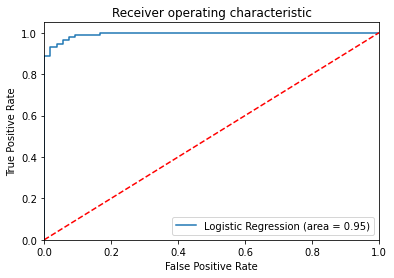

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [4]:
pip install pandas-datareader

In [11]:
pip install yfinance


  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8488 sha256=2f8402eed02af56167092fa9916130d00d2edb6ffb172d388be6fdfc7c2c91bb
  Stored in directory: c:\users\nismai01\appdata\local\pip\cache\wheels\21\c9\66\b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking


In [15]:
#Problem 2
# sharedata = pd.concat(map(pd.read_csv, ['ADANIPOWER.NS.csv', 'BHARTIARTL.NS.csv','BRIGADE.NS.csv']))
import yfinance as yf
from pandas_datareader import data 

companies_dict = {
    'Infosys':'INFY',
    'JSW Steel':'JSWSTEEL',
    'Tata Power':'TATAPOWER',
    'JSW Energy':'JSWENERY',
    'Sail':'SAIL',
    'Oberoi realty':'OBEROIRLTY',
    'Prestige Realty':'PRESTIGE',
    'NTPC':'NTPC',
    'Brigade':'BRIGADE',
    'Coal India':'COALINDIA',
    'Sobha':'SOBHA',
    'Tata Consultancies':'TCS',
    'Wipro':'WIT',
    'Hindalco':'HINDALCO',
    'Symantec':'HINDZINC',
    }


# data_source = 'yahoo'# Source of data is yahoo finance.
start_date = '2017-04-01'
end_date = '2021-09-30'

# yf.Ticker('PFE') can be used for yf finance
df = data.get_data_yahoo(list(companies_dict.values()),start_date,end_date)

#  old  =  pfizer.history(start="2010-01-01",  end=”2020-07-21”)
# old.head()

# pfizer.actions

# pfizer.dividends
# pfizer.splits

# pfizer.sustainability
# pfizer.recommendations
# pfizer.calendar



# old = old.reset_index()
# for i in ['Open', 'High', 'Close', 'Low']: 
#       old[i]  =  old[i].astype('float64')
        
        
# import plotly.graph_objects as go
# fig = go.Figure(data=[go.Candlestick(x=old['Date'],
#                                    open=old['Open'],
# high=old['High'],
# low=old['Low'],
# close=old['Close'])])
#             fig.show()        
        

C:\Users\nismai01\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'JSWSTEEL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\nismai01\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'TATAPOWER', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\nismai01\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'JSWENERY', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\nismai01\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'SAIL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\nismai01\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'OBEROIRLTY', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\nismai01\Anaconda

In [89]:
sharedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20024 entries, 0 to 1131
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20024 non-null  object 
 1   Open       19992 non-null  float64
 2   High       19992 non-null  float64
 3   Low        19992 non-null  float64
 4   Close      19992 non-null  float64
 5   Adj Close  19992 non-null  float64
 6   Volume     19992 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.2+ MB


In [91]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
print(kmeans.labels_)
kmeans.predict()
kmeans.cluster_centers_

NameError: name 'KMeans' is not defined

**Image Compresssion using K-means Clustering**

In [2]:
#Problem 3

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use("ggplot")
from skimage import io
from sklearn.cluster import KMeans
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

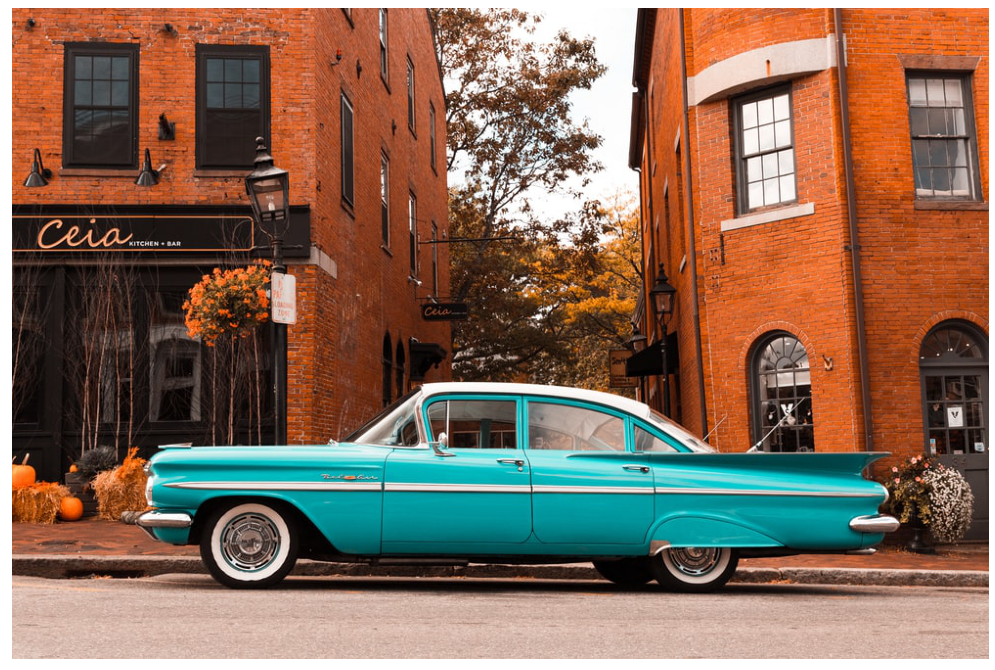

In [19]:
plt.rcParams['figure.figsize'] = (20, 12)
# image = io.imread('bird.png')
image = io.imread('car.jpg')
labels = plt.axes(xticks=[], yticks=[])
labels.imshow(image);

The image shape contains the **rows**, **columns** and **channels** in the image.
Coloured image - 3 channels
Grayscale - 1 channel

In [4]:
image.shape

(488, 326, 3)

In [5]:
image.size

477264

reshape this image so that it contains only 2 parameters: product of rows and columns i.e. no. of pixels and no. of channels. We will divide the image size by 255 because that is the maximum intensity value for RGB individually.

In [6]:
image_data = (image / 255.0).reshape(488 * 326, 3)
image_data.shape

(159088, 3)

In [54]:
from plot_utils import plot_utils
color = plot_utils(image_data, title='Original possible colors')
color.colorSpace()

ImportError: cannot import name 'plot_utils' from 'plot_utils' (C:\Users\nismai01\Anaconda3\lib\site-packages\plot_utils\__init__.py)

In [7]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16).fit(image_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(image_data)]
# reduced = plot_utils(image_data, colors=k_colors, title="Reduced color space only 160 colors")
# reduced.colorSpace()

k_colors

C:\Users\nismai01\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


array([[0.10939554, 0.38410739, 0.40064767],
       [0.26222238, 0.44657305, 0.4598534 ],
       [0.26222238, 0.44657305, 0.4598534 ],
       ...,
       [0.05201201, 0.30834999, 0.27228371],
       [0.05201201, 0.30834999, 0.27228371],
       [0.26222238, 0.44657305, 0.4598534 ]])

C:\Users\nismai01\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


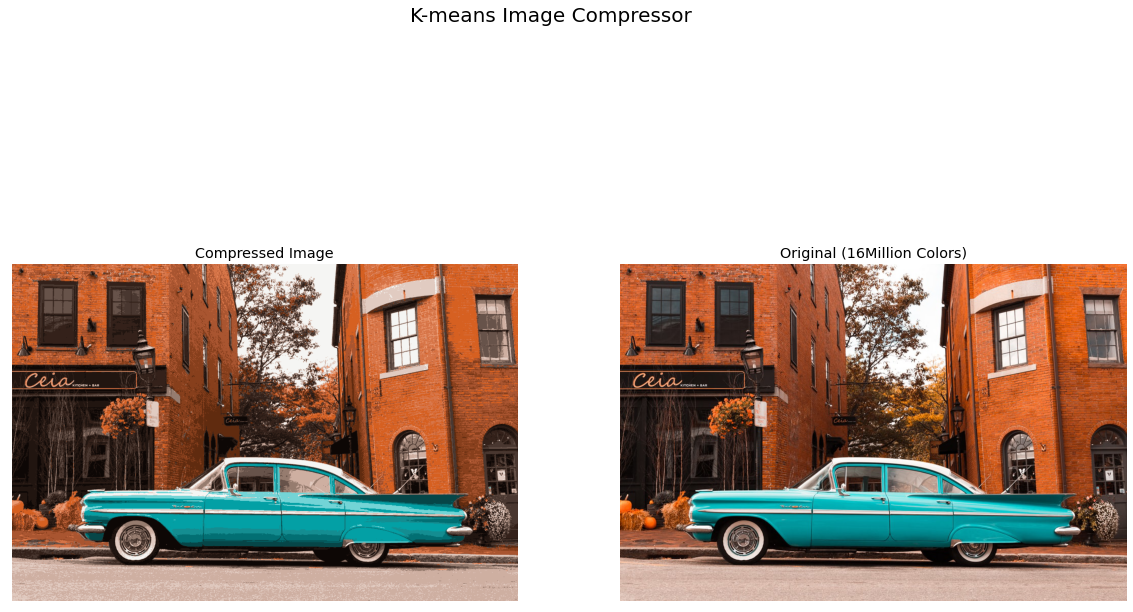

In [21]:
#location of image dataset
img_lib = 'Documents/'  
# @interact
#defining compression function                      
# k=IntSlider(min=1, max=256, step=1,value=160,  continuous_update=False, layout=dict(width='100%'))
#loading the image and reshaping it as done above
input_img = image
img_data = (input_img / 255.0).reshape(-1, 3)
#     image = io.imread('bird.png')

#Using K value to create clusters
kmeans = MiniBatchKMeans(20).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

# Reshaping the image according to the clusters
k_img = np.reshape(k_colors, (input_img.shape))

#Plotting the compressed and original image
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('K-means Image Compressor', fontsize=20)

ax1.set_title('Compressed Image')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(k_img)

ax2.set_title('Original Image')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(input_img)

plt.subplots_adjust(top=0.85)
plt.show()

import matplotlib
matplotlib.image.imsave('Compressed.jpg', k_img)

Using K value to create the clusters.
Reshaping the original image according to K value
Visualizing and comparing the original and compressed images.   
\nDownloading the compressed image.

https://analyticsindiamag.com/beginners-guide-to-image-compression-using-k-means-clustering/

In [1]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
positive_patches = faces.images
print("\nTarget names",lfw_people.target_names)
print("\nShape of data set",positive_patches.shape)


Target names ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']

Shape of data set (1217, 50, 37)


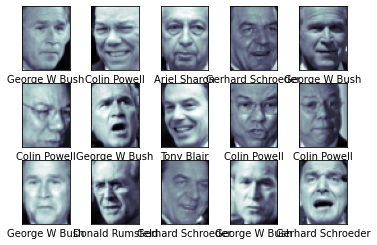

In [44]:
#Lets plot few of them:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [10]:
from sklearn.datasets import load_sample_images
from sklearn.feature_extraction import image

# Use the array data from the second image in this dataset:
X = load_sample_images().images[1]
print('Image shape: {}'.format(X.shape))
pe = image.PatchExtractor(patch_size=(2, 2))
pe_fit = pe.fit(X)
pe_trans = pe.transform(X)
print('Patches shape: {}'.format(pe_trans.shape))
print(pe_fit)

Image shape: (427, 640, 3)
Patches shape: (545706, 2, 2)
PatchExtractor(patch_size=(2, 2),
               random_state=RandomState(MT19937) at 0x1A8CDB7AB40)


In [15]:
from skimage import data, transform, color, feature

imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())
          for name in imgs_to_use]

images

<ipython-input-15-c13a19be925f>:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  images = [color.rgb2gray(getattr(data, name)())


[array([[200, 200, 200, ..., 189, 190, 190],
        [200, 199, 199, ..., 190, 190, 190],
        [199, 199, 199, ..., 190, 190, 190],
        ...,
        [ 25,  25,  27, ..., 139, 122, 147],
        [ 25,  25,  26, ..., 158, 141, 168],
        [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8),
 array([[ 91,  94,  99, ..., 135, 135, 134],
        [ 99, 104, 104, ..., 141, 141, 139],
        [105, 109, 109, ..., 145, 142, 141],
        ...,
        [146, 146, 141, ..., 142, 142, 142],
        [144, 140, 141, ..., 146, 141, 136],
        [145, 136, 143, ..., 143, 134, 126]], dtype=uint8),
 array([[ 47, 123, 133, ...,  14,   3,  12],
        [ 93, 144, 145, ...,  12,   7,   7],
        [126, 147, 143, ...,   2,  13,   3],
        ...,
        [ 81,  79,  74, ...,   6,   4,   7],
        [ 88,  82,  74, ...,   5,   7,   8],
        [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8),
 array([[116, 116, 122, ...,  93,  96,  96],
        [116, 116, 122, ...,  93,  96,  96],
        [116, 11

In [16]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 50, 37)

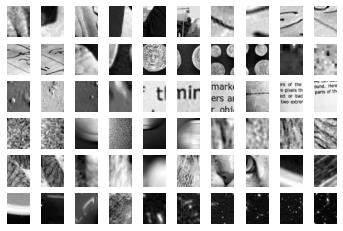

In [17]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [26]:
from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,
                                    negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [24]:
X_train.shape

(31217, 648)

The Histogram of Oriented Gradients (HOG) is a feature descriptor used in computer vision and image processing applications for the purpose of the object detection. It is a technique that counts events of gradient orientation in a specific portion of an image or region of interest.

In [25]:
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
# hog_vec, hog_vis = feature.hog(image, visualize=True)

image

<module 'sklearn.feature_extraction.image' from 'C:\\Users\\nismai01\\Anaconda3\\lib\\site-packages\\sklearn\\feature_extraction\\image.py'>

In [52]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

clf = GridSearchCV(LinearSVC(), {'C': [1.0, 3.0, 4.0, 10.0]})
clf.fit(X_train, y_train)
sorted(clf.cv_results_.keys())
print("Best score: ", clf.best_score_)

C:\Users\nismai01\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\nismai01\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\nismai01\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\nismai01\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\nismai01\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the numbe

Best score:  0.9975974731673851


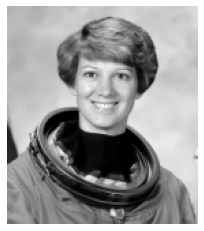

In [76]:
from skimage import data, color, feature, transform
# test_image = data.camera()
test_image = data.astronaut()
test_image = color.rgb2gray(test_image)
test_image = transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]

plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [75]:
def sliding_window(img, patch_size=positive_patches[0].shape,
                   istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

(2475, 648)

In [78]:
labels = clf.predict(patches_hog)
labels.sum()

16.0

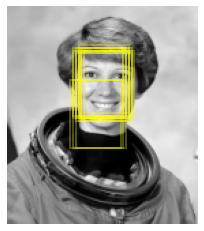

In [81]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='yellow',
                               alpha=0.3, lw=2, facecolor='none'))